#### In Data Analytics, we often use Model Development to help us predict future observations from the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'data/automobileEDA_MD.csv'

In [3]:
auto_md_df = pd.read_csv(path)

In [4]:
auto_md_df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear Regression and Multiple Linear Regression

#### Linear Regression

#### One example of a Data Model that we will be using is Simple Linear Regression. 
#### Simple Linear Regression is a method to help us understand the relationship between two variables:

* The predictor/independent variable (X)
* The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

* 𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒
* 𝑋:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

** Linear function: 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋**
 
#### a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
#### b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression()

In [7]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [8]:
X = auto_md_df[['highway-mpg']]
Y = auto_md_df[['price']]

In [9]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
Y_pred = lm.predict(X)
Y_pred[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

#### What is the value of the intercept (a)?

In [12]:
lm.intercept_

array([38423.30585816])

#### What is the value of the Slope (b)?

In [14]:
lm.coef_

array([[-821.73337832]])

#### Plugging in the actual values we get:

#### price = 38423.31 - 821.73 x highway-mpg

In [15]:
X_engine_size = auto_md_df[['engine-size']]
Y_price = auto_md_df[['price']]

In [16]:
lm.fit(X_engine_size, Y_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
Y_pred = lm.predict(X_engine_size)
Y_pred[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [18]:
lm.intercept_

array([-7963.33890628])

In [19]:
lm.coef_

array([[166.86001569]])

### Multiple Linear Regression

#### What if we want to predict car price using more than one variable?

#### If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

* 𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒
* 𝑋1:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1
* 𝑋2:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2
* 𝑋3:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3
* 𝑋4:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
* 𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡
* 𝑏1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1
* 𝑏2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2
* 𝑏3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3
* 𝑏4:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4

#### The equation is given by

#### 𝑌=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

#### Other good predictors of price could be:

* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg

In [20]:
X_multiple_independent_variables = auto_md_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [21]:
lm.fit(X_multiple_independent_variables, Y_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [23]:
lm.intercept_

array([-15806.62462633])

#### Price = -15806.62462633 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

In [24]:
X_normalized_highway = auto_md_df[['normalized-losses', 'highway-mpg']]

In [25]:
lm.fit(X_normalized_highway, Y_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
lm.intercept_

array([38201.31327246])

In [27]:
lm.coef_

array([[   1.49789586, -820.45434016]])

#### Price = 38201.31327246 + 1.49789586 * normalized-losses - 820.45434016 * highway-mpg

### Model Evaluation using Visualization

#### How do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

In [28]:
import seaborn as sns

#### Regression Plot

#### When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

#### This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's start with horsepower

(0, 48275.98470748988)

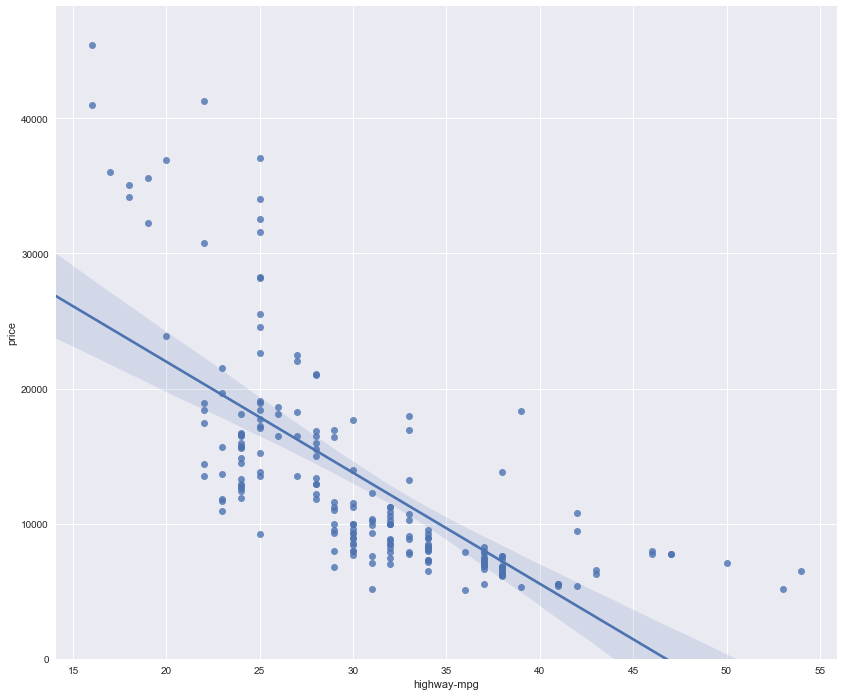

In [29]:
width = 14
height = 12
plt.figure(figsize=(width, height))
sns.regplot(x = 'highway-mpg', y = 'price', data = auto_md_df)
plt.ylim(0,)

#### We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

(0, 47422.674348910194)

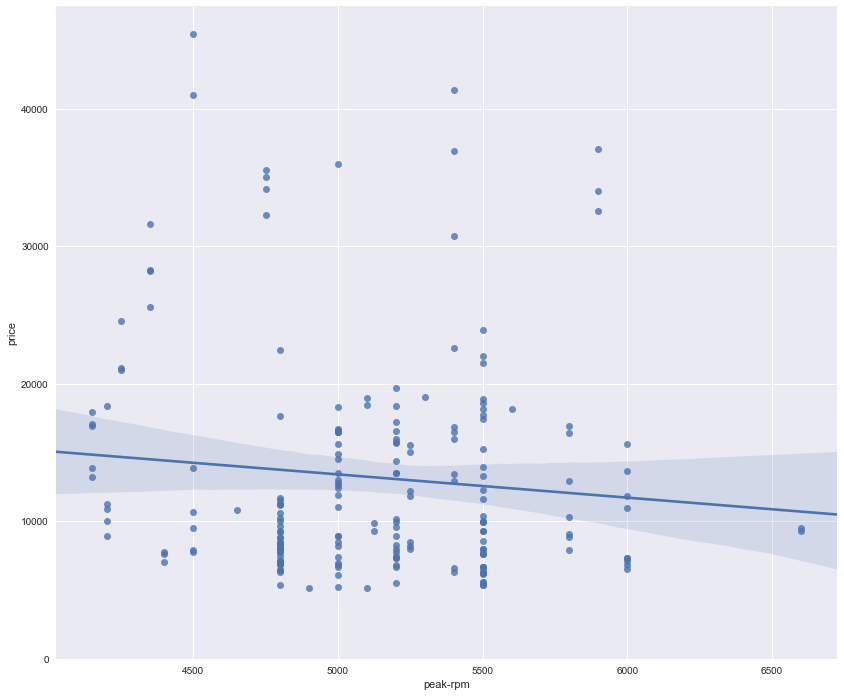

In [30]:
plt.figure(figsize=(width, height))
sns.regplot(x = 'peak-rpm', y = 'price', data = auto_md_df)
plt.ylim(0,)

#### Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [31]:
auto_md_df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to  "peak-rpm" which is approximate -0.101616.

### Residual Plot

#### A good way to visualize the variance of the data is to use a residual plot.

#### What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

#### What is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

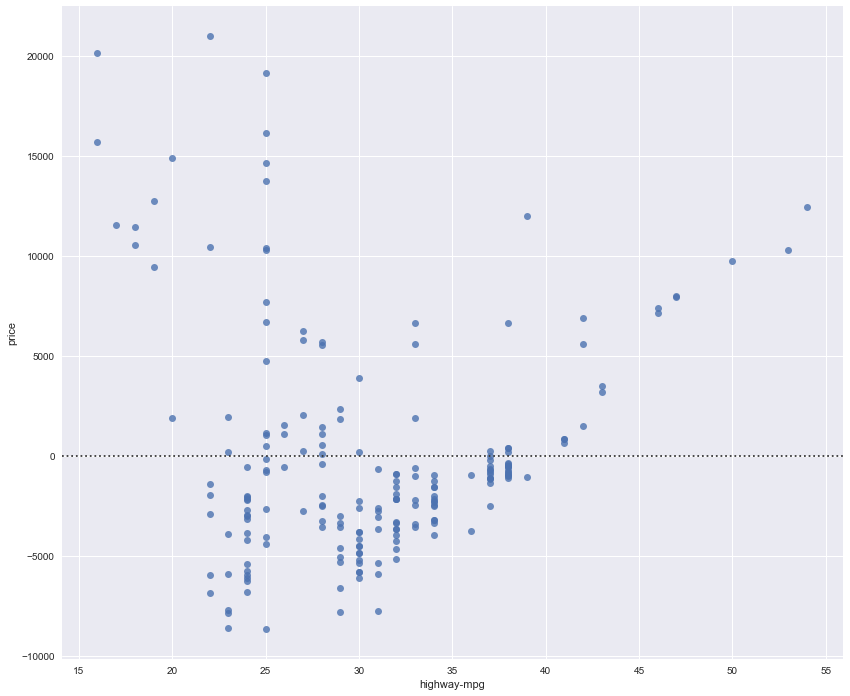

In [34]:
width = 14
height = 12
plt.figure(figsize=(width, height))
sns.residplot(auto_md_df['highway-mpg'], auto_md_df['price'])
plt.show()

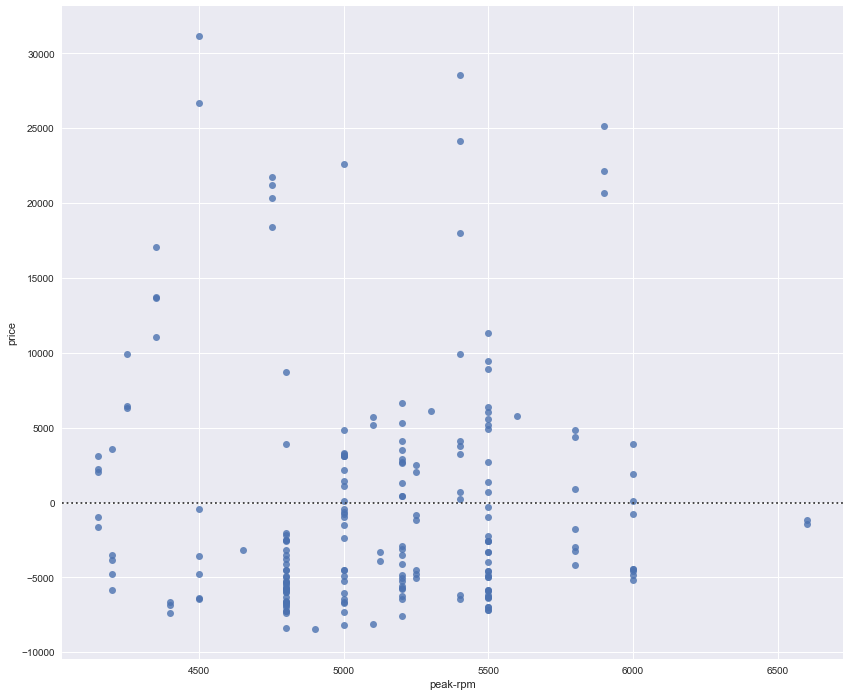

In [35]:
width = 14
height = 12
plt.figure(figsize=(width, height))
sns.residplot(auto_md_df['peak-rpm'], auto_md_df['price'])
plt.show()

#### We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

#### One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [36]:
X_multiple_independent_variables = auto_md_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [37]:
lm.fit(X_multiple_independent_variables, Y_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
Yhat = lm.predict(X_multiple_independent_variables)

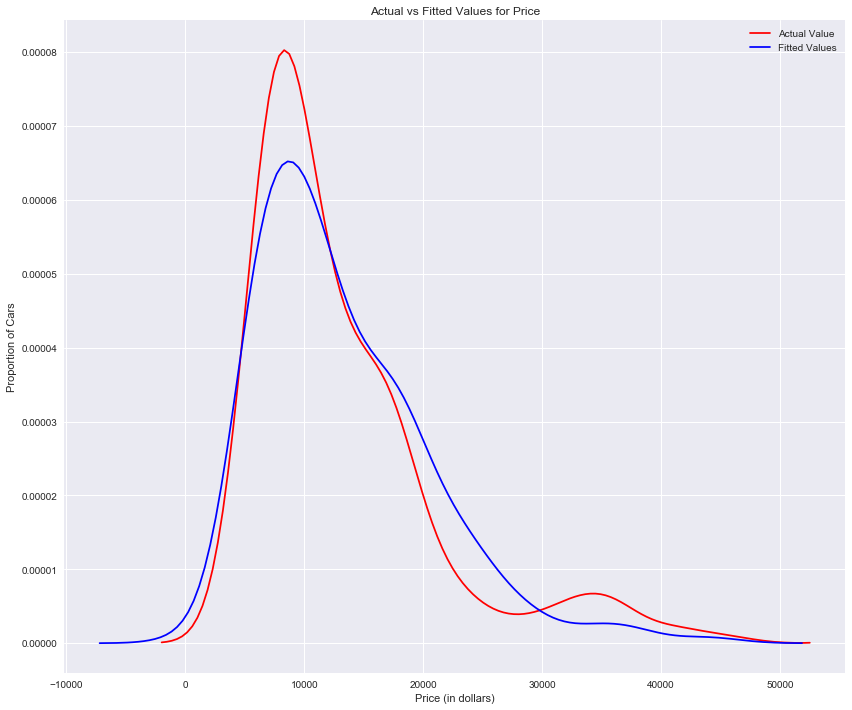

In [39]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(auto_md_df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

---

## Polynomial Regression and Pipelines

#### Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

#### We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

#### There are different orders of polynomial regression:

- Quadratic - 2nd order ** 𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2**
- Cubic - 3rd order ** 𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3**
- Higher order: **𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3....**

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [40]:
def PlotPolynomial(model, independent_variable, dependent_variabble, name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [41]:
m = auto_md_df['highway-mpg']
n = auto_md_df['price']

#### Now let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [43]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(m, n, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


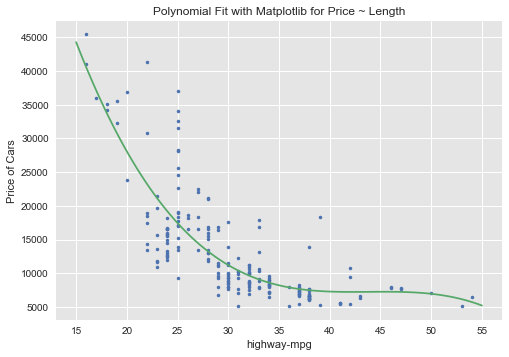

In [44]:
PlotPolynomial(p, m, n, 'highway-mpg')

In [45]:
np.polyfit(m, n, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

#### We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


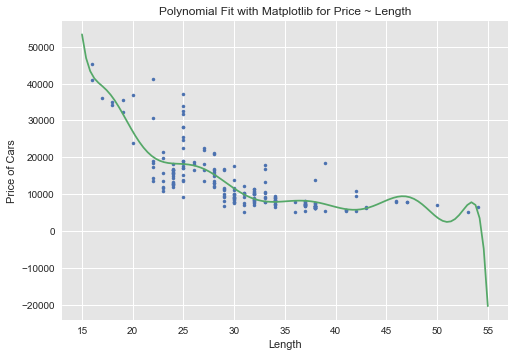

In [47]:
# 11 order polynomial
f11 = np.polyfit(m, n, 11)
p11 = np.poly1d(f11)
print(p11)
PlotPolynomial(p11, m, n, 'Length')

#### We can perform a polynomial transform on multiple features. First, we import the module:

In [48]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [49]:
pf = PolynomialFeatures(degree=2)
pf

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [51]:
X_multiple_independent_variables.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


In [54]:
X_multiple_independent_variables = auto_md_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [55]:
X_multiple_independent_variables_pr = pf.fit_transform(X_multiple_independent_variables)

After the transformation, there 201 samples and 15 features

In [56]:
X_multiple_independent_variables_pr.shape

(201, 15)

The original data is of 201 samples and 4 features

In [57]:
X_multiple_independent_variables.shape

(201, 4)

### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [59]:
input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [60]:
pipeline = Pipeline(input)
pipeline

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

We can normalize the data, perform a transform and fit the model simultaneously.

In [61]:
pipeline.fit(X_multiple_independent_variables, auto_md_df[['price']])

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [64]:
y_predict_pipeline = pipeline.predict(X_multiple_independent_variables)
y_predict_pipeline[0:5]

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[13102.74784201],
       [13102.74784201],
       [18225.54572197],
       [10390.29636555],
       [16136.29619164]])

---

## Measures for In-Sample Evaluation

#### When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

#### Two very important measures that are often used in Statistics to determine the accuracy of a model are:
- ** R^2 / R-squared**
- ** Mean Squared Error (MSE)**

#### R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

#### Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [66]:
auto_md_df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

### Model 1: Simple Linear Regression

In [87]:
X = auto_md_df[['highway-mpg']]
Y = auto_md_df['price']
lm = LinearRegression()
lm.fit(X, Y)
print("The R-squared value is: ", lm.score(X, Y))

The R-squared value is:  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model

Let's calculate the MSE

We can predict the output i.e., "y" using the predict method, where X is the input variable:

In [88]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:5])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


Let's import the function mean_squared_error from the module metrics

In [89]:
from sklearn.metrics import mean_squared_error

We compare the predicted results with the actual results

In [90]:
mse = mean_squared_error(auto_md_df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Model 2: Multiple Linear Regression

In [73]:
lm.fit(X_multiple_independent_variables, auto_md_df['price'])
print('The R-square is: ', lm.score(X_multiple_independent_variables, auto_md_df['price']))

The R-square is:  0.8093562806577457


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

In [74]:
Y_predict_multifit = lm.predict(X_multiple_independent_variables)

In [75]:
print('The mean square error of price and predicted value using multifit is: ',
      mean_squared_error(auto_md_df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit

#### Let’s import the function r2_score from the module metrics as we are using a different function

In [76]:
from sklearn.metrics import r2_score

In [80]:
r_squared = r2_score(auto_md_df['price'], p(auto_md_df['highway-mpg'])) # y = auto_md_df['price'], x = auto_md_df['highway-mpg]
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [81]:
mean_squared_error(auto_md_df['price'], p(auto_md_df['highway-mpg']))

20474146.42636125

---

## Prediction and Decision Making

#### In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. 

In [82]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [84]:
X = auto_md_df[['highway-mpg']]
Y = auto_md_df['price']
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now let's predict

In [85]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

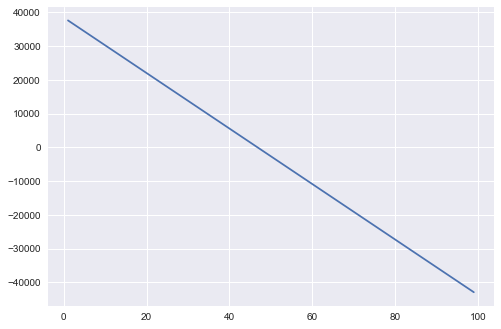

In [86]:
plt.plot(new_input, yhat)
plt.show()

#### Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
**When comparing models, the model with the higher R-squared value is a better fit for the data.**

What is a good MSE?
**When comparing models, the model with the smallest MSE value is a better fit for the data.**

Now let's take a look at the values for the different models.

** Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.**

- R-squared: 0.49659118843391759
- MSE: 3.16 x10^7

** Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.**

- R-squared: 0.80896354913783497
- MSE: 1.2 x10^7

** Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.**

- R-squared: 0.6741946663906514
- MSE: 2.05 x 10^7

** Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)**

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

** Simple Linear Model (SLR) vs Polynomial Fit **

MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

** Multiple Linear Regression (MLR) vs Polynomial Fit**

MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

---

## Conclusion

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.